# Chapter 4: Intro to Basic Stats

[JP Gannon](https://jpgannon.github.io/)
[](https://orcid.org/0000-0002-4595-3214)
([Virginia Tech](https://www.vt.edu/))  
2026-02-06

The code and classroom notes for following along can be found at the
following link

<https://github.com/VT-Hydroinformatics/4-Intro-Stats>

# Introduction to Basic Statistics

In [ ]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

## Reading for this section: Statistical Methods in Water Resources: Chapter 1

<https://pubs.usgs.gov/tm/04/a03/tm4a3.pdf>

## Questions for today:

-   *What is the difference between a sample and a population?*
-   *How do we look at the distribution of data in a sample*
-   *How do we measure aspects of a distribution*
-   *What is a normal distribution?*

First let’s generate some synthetic data and talk about how to visualize
it.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

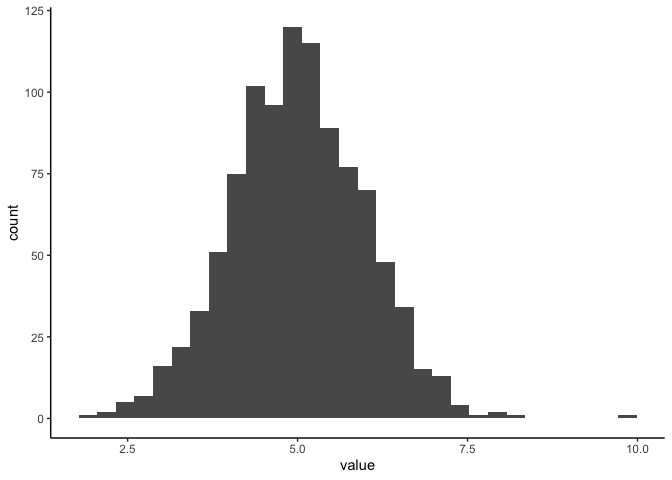

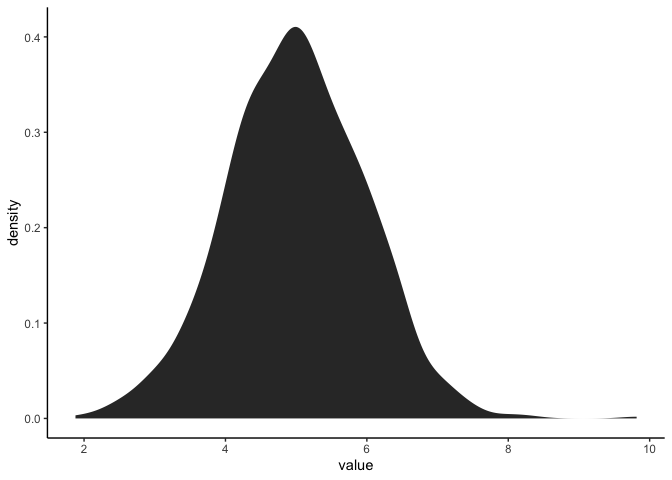

In [ ]:
#generate a normal distribution
ExNorm <- rnorm(1000, mean = 5) |> 
  as_tibble()

#look at distributions
#histogram
ExNorm |>
  ggplot(aes(value)) +
  geom_histogram()

**Stack plots to compare histogram and pdf**

We will save each plot as ggplot object and then output them using the
patchwork package (loaded in the setup chunk).

What is the difference between a histogram and a pdf?  
What features of the histogram are preserved? Which are lost?

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

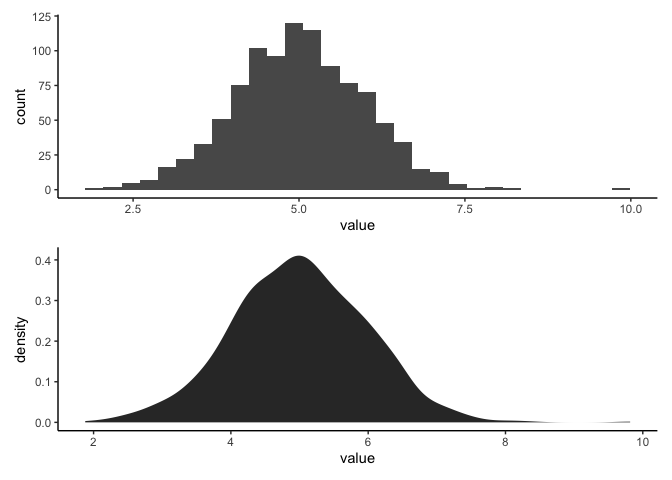

In [ ]:
#histogram
exhist <- ExNorm |>
  ggplot(aes(value)) +
  geom_histogram()

#pdf
expdf <- ExNorm |>
  ggplot(aes(value)) +
  stat_density()

#put the plots side by side with + or on top of each other with /
exhist/expdf

## What is the difference between a sample and a population.

Simply put: a population is the thing you are trying to measure. A
sample is the data you measure in an effort to measure the population. A
sample is a subset of a population.

Let’s write some code for an example:

We will create a POPULATION that is a large set of numbers. Think of
this is as the concentration of Calcium in every bit of water in a lake.
Then we will create a SAMPLE by randomly grabbing values from the
POPULATION. This simulates us going around in a boat and taking grab
samples in an effort to figure out the concentration of calcium in the
lake.

We can then run this code a bunch of times, you’ll get a different
sample each time. You can also take a smaller or larger number of
samples by changing “size” in the sample() function.

How does your sample distribution look similar or different from the
population?  
Why does the sample change every time you run it?  
What happens as you increase or decrease the number of samples?  
What happens if you set the number of samples to the size of the
population?

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

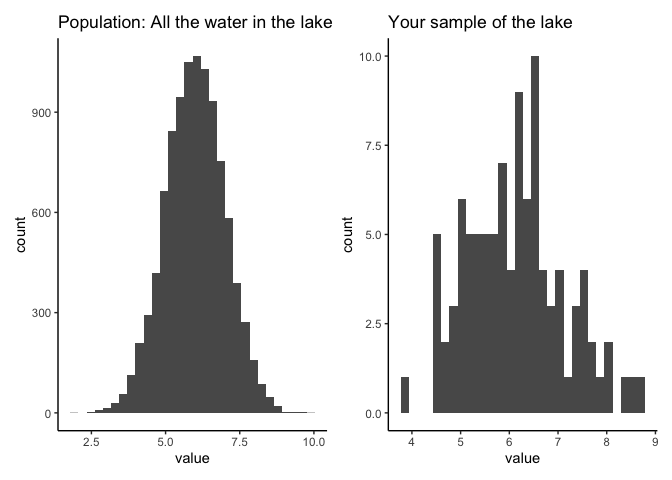

In [ ]:
all_the_water <- rnorm(10000, mean = 6) |> as_tibble()

sample_of_water <- sample(all_the_water$value, size = 100, replace = FALSE) |> as_tibble()

population_hist <- all_the_water |>
  ggplot(aes(value))+
  geom_histogram()+
  ggtitle("Population: All the water in the lake")

sample_hist <- sample_of_water |>
  ggplot(aes(value))+
  geom_histogram()+
  ggtitle("Your sample of the lake")

population_hist + sample_hist

## Measuring our sample distribution: central tendency.

When we take a sample of a population, there are a few things we will
want to measure about the distribution of values: where is the middle,
how variable is it, and is it skewed to one side or another?

The first of these, “where is the middle?” is addressed with measures of
central tendency. We will discuss three possible ways to measure this.
The mean, median, and weighted mean.

To explain the importance of choosing between the mean and median, we
will first import some discharge data. Read in the PINE discharge data.

In [ ]:
pineQ <- read_csv("PINE_Jan-Mar_2010.csv")

Rows: 2160 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): StationID, surrogate
dbl  (5): cfs, year, quarter, month, day
dttm (1): datetime

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

To find the mean (average), you just sum up all the values in your
sample and divide by the number of values.

To find the median, you put the values IN ORDER, and choose the middle
value. The middle value is the one where there are the same number of
values higher than that value as there are values lower than it.

Because it uses the order of the values rather than just the values
themselves, the median is resistant to skewed distributions. This means
it is less effected by very large or very small values compared to most
values in the sample data.

Let’s look at our normal distribution from earlier (ExNorm) compared to
the Pine watershed discharge (pineQ)

Note that distributions like pineQ, that are positively skewed, are very
common in environmental data.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

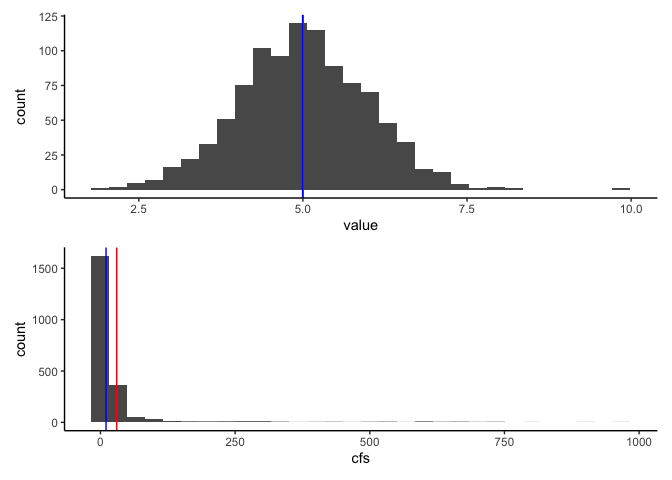

In [ ]:
#Calculate mean and median for cfs in pineQ and values in ExNorm
pineMean <- mean(pineQ$cfs)
pineMedian <- median(pineQ$cfs)

xmean <- mean(ExNorm$value)
xmedian <- median(ExNorm$value)

#plot mean and median on the ExNorm distribution
Ex <- ExNorm |> ggplot(aes(value)) +
  geom_histogram()+
  geom_vline(xintercept = xmean, color = "red")+
  geom_vline(xintercept = xmedian, color = "blue")

#plot mean and median on the pineQ discharge histogram
PineP <- pineQ |> ggplot(aes(cfs)) +
  geom_histogram()+
  geom_vline(xintercept = pineMean, color = "red")+
  geom_vline(xintercept = pineMedian, color = "blue")

Ex / PineP  

**So what’s a weighted average?**

When you compute a standard mean or median, you are giving equal weight
to each measurement. Adding up all the values in a sample and dividing
by the number of samples is the same as multiplying each value by 1/# of
samples. For instance if you had ten samples, to calculate the mean you
would add them up and divide by 10. This is the same as multiplying each
value by 1/10 and then adding them up. Each value is equally weighted at
1/10.

There are certain situations in which this is not the ideal way to
calculate an average. A common one in hydrology is that you have samples
that are supposed to represent different portions of an area. One sample
may be taken to measure a forest type that takes up 100 ha of a
watershed while another sample represents a forest type that only takes
up 4 ha. You may not want to simply average those values!

Another example is precipitation gages. In the image below, you see
there are 5 rain gages. To get a precipitation number for the watershed,
we could just average them, or we could assume they represent an area of
the watershed and then weight their values by the area they represent.
One method of designating the areas is by using Theissen polygons (the
middle watershed). Another method of weighting is isohyetal contours,
but we won’t worry about that for now!

In the weighted situation, we find the average by multiplying each
precipitation values by the proportion of the watershed it represents,
shown by the Thiessen polygons, and then add them all together. Let’s do
an example.

![](attachment:images/theissen.png "Different types of area averaging")

*Different types of area averaging*  
*source:
<https://edx.hydrolearn.org/assets/courseware/v1/e5dc65098f1e8c5faacae0e171e28ccf/asset-v1:HydroLearn+HydroLearn401+2019_S2+type@asset+block/l2_image004.png>*

The precip values for the watershed above are 4.5, 5.5, 5.8, 4.7, and
3.0

We will assume the proportions of the watershed that each gauge
represents are 0.20, 0.15, 0.40, 0.15, 0.10, respectively (or 20%, 15%,
40%, 15%, 10%)

Write some code to compute the regular mean precip from the values, and
then the weighted mean.
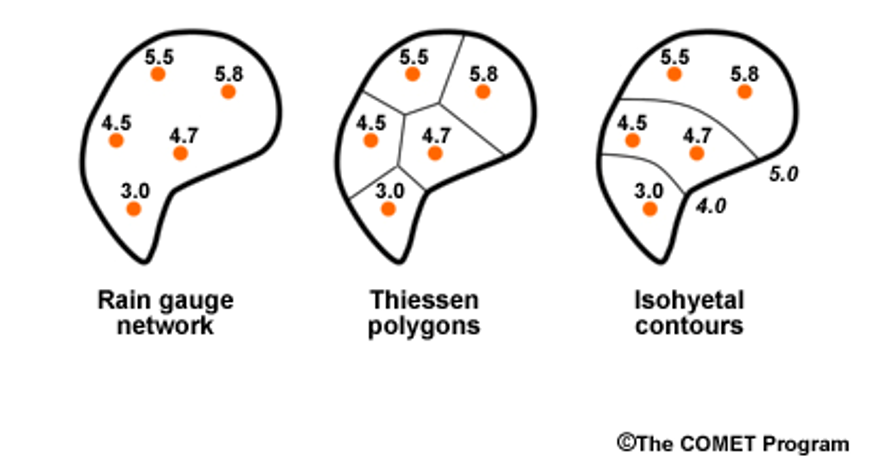

In [ ]:
precip <- c(4.5, 5.5, 5.8, 4.7, 3.0)
weights <- c(0.2, 0.15, 0.4, 0.15, 0.1)

mean(precip)

[1] 4.7

[1] 5.05

## Measures of variability

Measures of variability allow us to measure the width of our sample data
histogram or pdf. If all the values in our sample are close together, we
would have small measures of variability, and a pointy pdf/histogram. If
they vary more, we would have larger measures of variability and a broad
pdf/histogram.

We will explore four measures of variability:

### Variance:

Sum of the squared difference of each value from the mean divided by the
number of samples minus 1. var()

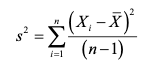

*Formula for variance (from USGS statistics book linked:
<https://pubs.usgs.gov/tm/04/a03/tm4a3.pdf>*  *source:
<https://pubs.usgs.gov/tm/04/a03/tm4a3.pdf>*

### Standard deviation:

The square root of the variance sd()

\*\*Both variance and standard deviation are sensitive to outliers.

### CV: Coefficient of Variation

CV is simply the standard deviation divided by the mean of the data.
Because you divide by the mean, CV is dimensionless. This allows you to
use it to compare the variation in samples with very different
magnitudes.

#### IQR: Interquartile Range

IQR is resistant to outliers because it works like a median. It measures
the range of the middle 50% of the data in your distribution. So the IQR
is the difference between the value between the 75th and 25th
percentiles of your data, where the 75th percentile means 75% of the
data is BELOW that value and the 25th percentile means 25% is below that
value. Using the same vocabulary, the median is the same as the 50th
percentile of the data.

If you ask R for the QUANTILES of your sample data, it will give you the
values at which 0%, 25%, 50%, 75%, and 100% of the data are below. These
are the 1,2,3,4, and 5th quantiles. Therefore, the IQR is the difference
between the 4th and 2nd quantile.

Okay, code time.

First, let’s explore how changing the variability of a distribution
changes the shape of it’s distribution. Create a plot a random normal
distribution using rnorm() and set sd to different numbers. Make the
mean of the distribution 0, the sample size 300, and the standard
deviation 1 to start. Then increase the standard deviation incrementally
to 10 and see what happens. Make the limits of the x axis on the plot
-30 to 30.

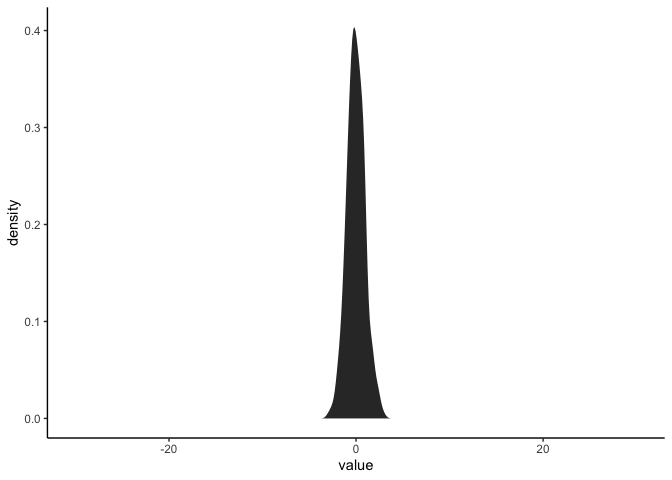

In [ ]:
rnorm(300, mean = 0, sd = 1) |> as_tibble() |>
  ggplot(aes(value))+
  stat_density()+
  xlim(c(-30,30))

Now let’s calculate the standard deviation, variance, coefficient of
variation, and IQR of the Pine discharge data.

In [ ]:
#standard deviation
sd(pineQ$cfs)

[1] 84.47625

[1] 7136.237

[1] 2.800221

[1] 8.1325

   75% 
8.1325 

### What about how lopsided the distribution is?

There are several ways to measure this as well, but we are just going to
look at one: The Quartile skew. The quartile skew is the difference
between the upper quartiles (50th-75th) and the lower quartiles
(25th-50th) divided by the IQR (75th-25th).

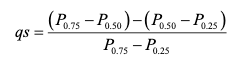

*Quartile skew from USGS Stats Book linked above*  
*source: <https://pubs.usgs.gov/tm/04/a03/tm4a3.pdf>*

Let’s look at the quartile skew of the two distributions we’ve been
measuring. Calculate it for the pineQ discharge data and the random
normal distribution we generated.

Which one is more skewed?

In [ ]:
quantsP <- quantile(pineQ$cfs)

((quantsP[4]-quantsP[3]) - (quantsP[3] - quantsP[2])) / (quantsP[4] - quantsP[2])

      75% 
0.5044574 

In [ ]:
quantsX <- quantile(ExNorm$value)

((quantsX[4]-quantsX[3]) - (quantsX[3] - quantsX[2])) / (quantsX[4] - quantsX[2])

       75% 
0.02354529 

## What is a normal distribution and how can we determine if we have one?

The distribution we generated with rnorm() is a normal distribution. The
distribution of pineQ discharge is not normal. Now that we’ve looked at
different ways to characterize distributions, we have the vocabulary to
describe why.

**Normal distributions:**

-   mean = median, half values to the right, half to the left
-   symmetric (not skewed)
-   single peak

Many statistical tests require that the distribution of the data you put
into them is normally distributed. BE CAREFUL! There are also tests that
use ranked data. Similar to how the median is resistant to outliers,
these rank-based tests are resistant to non-normal data. Two popular
ones are Kruskal-Wallis and Wilcoxon rank-sum.

But how far off can you be before you don’t consider a distribution
normal? Seems like a judgement call!

R to the rescue! There is a built in test for normality called
shapiro.test(), which performs the Shapiro-Wilk test of normality. The
hypothesis this test tests is “The distribution is normal.” So if this
function returns a p-value less than 0.05, you reject that hypothesis
and your function is NOT normal.

You can also make a quantile-quantile plot. A straight line on this plot
indicates a normal distribution, a non-straight line indicates it is not
normal.


    Shapiro-Wilk normality test

data:  pineQ$cfs
W = 0.27155, p-value < 2.2e-16

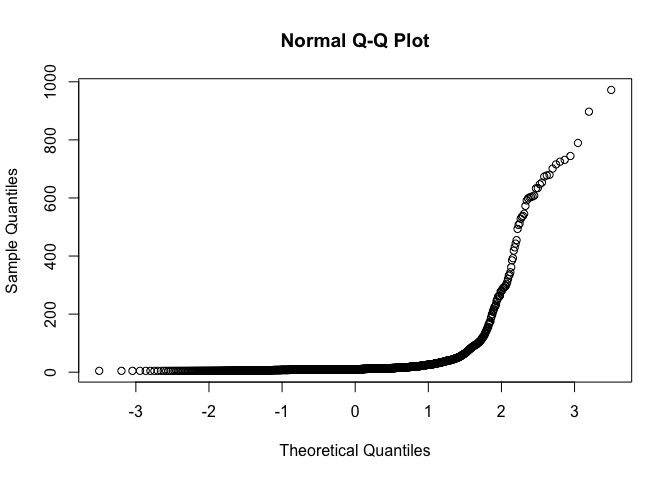

In [ ]:
shapiro.test(pineQ$cfs)